# Authors

- Ikram Kohil, 2019115
- Johnatan Gao, 2013298

In [8]:
from IPython import display
from base64 import b64decode

# Vector of metrics

To solve the problems posed in this laboratory, we will extract metrics from the AST. To do this, we will find in the Python class AST a method called "vectorize". This method returns a vector corresponding to the occurrences of each type of node: a concrete example of the applied transformation is available below.

In order to solve the problems in this lab, we need to extract the metrics of AST.

# Fragmentation

The vector of metrics extracted previously applies to the entire AST, hence to the entire file. To extract metrics at a finer level, it will be necessary to fragment the AST. For instance, if we want to extract metrics from each function to perform similarity calculations on them, we will need to fragment the AST at the level of functions (nodes *MethodStatement and *FunctionStatement).

digraph ast {
node [shape=none];
67852299 [label=<<TABLE border='1' cellspacing='0' cellpadding='10' style='rounded'><TR><TD border='0'>67852299</TD><TD border='0'><B>Start</B></TD></TR></TABLE>>];
67852299 -> 67852083 [weight=10];
67852299 -> 67852085 [weight=10];
67852299 -> 67852090 [weight=10];
67852299 -> 67852097 [weight=10];
67852299 -> 67852104 [weight=10];
67852299 -> 67852109 [weight=10];
67852299 -> 67852114 [weight=10];
67852299 -> 67852123 [weight=10];
67852299 -> 67852138 [weight=10];
67852299 -> 67852251 [weight=10];
67852299 -> 67852259 [weight=10];
67852299 -> 67852264 [weight=10];
67852299 -> 67852266 [weight=10];
67852299 -> 67852298 [weight=10];
67852298 [label=<<TABLE border='1' cellspacing='0' cellpadding='10' style='rounded'><TR><TD border='0'>67852298</TD><TD border='0'><B>FunctionCall</B></TD></TR><HR/><TR><TD border='0' colspan='2'>fwrite</TD></TR></TABLE>>];
67852298 -> 67852274 [weight=10];
67852298 -> 67852295 [weight=10];
67852297 [label=<<TABLE border='1'

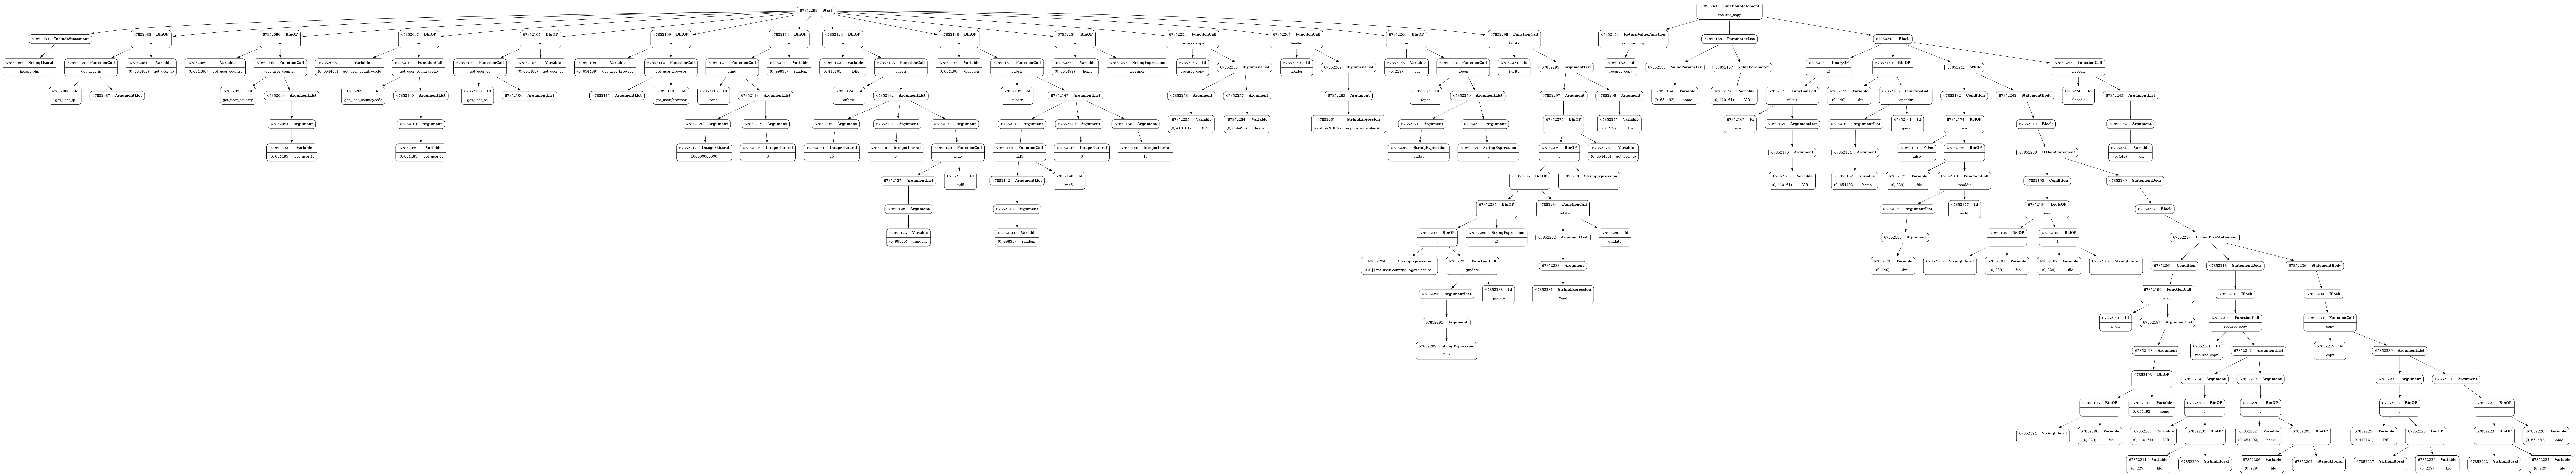

In [9]:
import tempfile
from collections import defaultdict
from collections.abc import Iterable
from copy import deepcopy
from pathlib import Path
import copy
import os

from code_analysis import CFG, ASTReader, CFGReader, Graph, AST_fragmentation
from graphviz import Source
from IPython.display import Image, display
from pydantic import BaseModel

part2_output_directory = "./output/extracted_fragments/"

def show_graph(graph: Graph):
    """Afficher le graphe dans Jupyter"""
    dot = graph.to_dot()
    s = Source(dot)
    # Specify the file path with .dot extension
    with tempfile.NamedTemporaryFile(suffix=".dot") as f:
        s.render(f.name, format="png")
        display(Image(f.name + ".png"))


def create_output_file(file_path: str, content: str):
    # Check if output directory exists, if not, create it
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Delete the file if it exists
    # create the file using append

    # Create the file
    with open(file_path, "a") as file:
        # You can optionally write some content to the file here
        file.write(content)

def output_fragments(source_directory, target_directory):
    # Check if target directory exists, if not, create it
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    # Use os.walk to recursively visit the source folder
    for current_dir, dir_names, file_names in os.walk(source_directory):
        for filename in file_names:
            # Find all zipped files
            if filename.endswith('.ast.json'):
                # Construct source path from source directory and the filename
                source_path = os.path.join(current_dir, filename)

                # Construct target path by replacing the source directory with target directory
                target_rel_path = os.path.relpath(current_dir, source_directory)
                target_dir = os.path.join(target_directory, target_rel_path)
                target_path = os.path.join(target_dir, filename[:-3])
                
                # Check if target directory exists, if not, create it (this is for the target directories within the main directory)
                if not os.path.exists(target_dir):
                    os.makedirs(target_dir)
                
                # Write the extracted fragments in their own ast.json file
                ast = ASTReader().read_ast(source_path)
                fragments = AST_fragmentation(ast)

                for idx, fragment in enumerate(fragments):
                    output_filename = f"{filename}_{idx}.fragment.json"
                    output_filepath = os.path.join(target_dir, output_filename)
                    ast_copy = copy.deepcopy(ast)
                    ast_copy.set_root(fragment)
                    create_output_file(output_filepath, ast_copy.to_json())

#output_fragments("./output/extracted_ast/", target_directory=part2_output_directory)
#show_graph(ASTReader().read_ast("output/extracted_fragments/0229/io/Login/index.php.ast.json_0.fragment.json"))